#### IMPORTING REQUIRED LIBRARIES

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore") 

import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

#import LogisticRegression from Sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier #import Decision tree
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier #import randomforest Classifier
from sklearn.ensemble import AdaBoostClassifier #import adaboostclassifer
from sklearn.model_selection import GridSearchCV
# for calculating F-1 score(import Scoring metric)
from sklearn.metrics import f1_score,classification_report 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score,recall_score,f1_score,classification_report #import Scoring metric

#### IMPORT A CSV FILE TO DATAFRAME FORMAT

In [2]:
data = pd.read_csv(r"C:\Users\Hi\Downloads\Insurance Dataset.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 24 columns):
 #   Column                                 Non-Null Count    Dtype  
---  ------                                 --------------    -----  
 0   Area_Service                           1046119 non-null  object 
 1   Hospital County                        1046119 non-null  object 
 2   Hospital Id                            1046119 non-null  float64
 3   Age                                    1048575 non-null  object 
 4   Gender                                 1048575 non-null  object 
 5   Cultural_group                         1048575 non-null  object 
 6   ethnicity                              1048575 non-null  object 
 7   Days_spend_hsptl                       1048575 non-null  object 
 8   Admission_type                         1048575 non-null  object 
 9   Home or self care,                     1048575 non-null  object 
 10  ccs_diagnosis_code                     104

In [3]:
## Check for null values
data.isnull().sum()

Area_Service                             2456
Hospital County                          2456
Hospital Id                              2456
Age                                         0
Gender                                      0
Cultural_group                              0
ethnicity                                   0
Days_spend_hsptl                            0
Admission_type                              0
Home or self care,                          0
ccs_diagnosis_code                          0
ccs_procedure_code                          0
apr_drg_description                         0
Code_illness                                0
Mortality risk                             42
Surg_Description                            0
Weight_baby                                 0
Abortion                                    0
Emergency dept_yes/No                       0
Tot_charg                                   0
Tot_cost                                    0
ratio_of_total_costs_to_total_char

In [4]:
## show no. of rows and columns
data.shape

(1048575, 24)

In [5]:
## show all columns in dataframe
data.columns

Index(['Area_Service', 'Hospital County', 'Hospital Id', 'Age', 'Gender',
       'Cultural_group', 'ethnicity', 'Days_spend_hsptl', 'Admission_type',
       'Home or self care,', 'ccs_diagnosis_code', 'ccs_procedure_code',
       'apr_drg_description', 'Code_illness', 'Mortality risk',
       'Surg_Description', 'Weight_baby', 'Abortion', 'Emergency dept_yes/No',
       'Tot_charg', 'Tot_cost', 'ratio_of_total_costs_to_total_charges',
       'Result', 'Payment_Typology'],
      dtype='object')

In [6]:
## show data type of each variable
data.dtypes

Area_Service                              object
Hospital County                           object
Hospital Id                              float64
Age                                       object
Gender                                    object
Cultural_group                            object
ethnicity                                 object
Days_spend_hsptl                          object
Admission_type                            object
Home or self care,                        object
ccs_diagnosis_code                         int64
ccs_procedure_code                         int64
apr_drg_description                       object
Code_illness                               int64
Mortality risk                           float64
Surg_Description                          object
Weight_baby                                int64
Abortion                                  object
Emergency dept_yes/No                     object
Tot_charg                                float64
Tot_cost            

In [7]:
## show description of the data in the DataFrame
data.describe()

,Hospital Id,ccs_diagnosis_code,ccs_procedure_code,Code_illness,Mortality risk,Weight_baby,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
count,1.046119e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048533e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,6.529400e+02,1.987936e+02,9.723249e+01,2.051806e+00,1.748955e+00,2.935512e+02,2.708697e+04,1.046399e+04,4.565822e-01,7.499769e-01,1.935755e+00
std,6.711577e+02,1.652839e+02,8.732697e+01,9.145785e-01,9.864236e-01,9.494631e+02,5.487428e+04,2.230366e+04,8.029246e-01,4.330263e-01,7.717916e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,3.100000e-01,1.000000e-01,3.312909e-02,0.000000e+00,1.000000e+00
25%,2.130000e+02,1.080000e+02,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,7.402500e+03,3.234570e+03,3.135802e-01,0.000000e+00,1.000000e+00
50%,6.300000e+02,1.590000e+02,9.000000e+01,2.000000e+00,1.000000e+00,0.000000e+00,1.458988e+04,5.928480e+03,4.091384e-01,1.000000e+00,2.000000e+00
75%,9.770000e+02,2.180000e+02,1.740000e+02,3.000000e+00,3.000000e+00,0.000000e+00,2.914547e+04,1.134317e+04,5.192548e-01,1.000000e+00,3.000000e+00
max,9.250000e+03,6.700000e+02,2.310000e+02,4.000000e+00,4.000000e+00,9.000000e+03,6.196974e+06,2.562478e+06,1.575596e+02,1.000000e+00,5.000000e+00


In [8]:
data['Result']=data['Result'].replace({0:1,1:0})


### Assigning X as predictors and y as target

In [9]:
X = data.drop(["Result"],axis=1)  #predictors
y = data["Result"] #target

### Train-Test Split

In [13]:
from sklearn.model_selection import train_test_split

# Split dataset into train and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Split train set into train and validation sets (75/25 split)
# X_train, X_valid, y_train, y_valid = train_test_split(X_train_test, y_train_test, test_size=0.25, random_state=42, stratify=y_train_test)


In [14]:
# Define column names for X_test based on the original dataset X
columns = list(X.columns)

# Convert test data to pandas dataframe
test_df = pd.DataFrame(X_test, columns=columns)

# Add target variable to test dataframe
test_df['Result'] = y_test

# Save test dataframe to CSV file
test_df.to_csv('TestData.csv', index=False)


In [15]:
# Define column names for X_test based on the original dataset X
columns = list(X.columns)

# Convert test data to pandas dataframe
train_df = pd.DataFrame(X_train, columns=columns)

# Add target variable to test dataframe
train_df['Result'] = y_train

# Save test dataframe to CSV file
train_df.to_csv('TrainData.csv', index=False)


In [16]:
data1=pd.read_csv('TrainData.csv')
data1

,Area_Service,Hospital County,Hospital Id,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,"Home or self care,",...,Mortality risk,Surg_Description,Weight_baby,Abortion,Emergency dept_yes/No,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Payment_Typology,Result
0,Central NY,Onondaga,636.0,50 to 69,M,White,Not Span/Hispanic,5,Elective,Home or Self Care,...,1.0,Medical,0,N,N,8990.22,4801.74,0.534107,1,1
1,Western NY,Erie,210.0,50 to 69,M,White,Not Span/Hispanic,6,Emergency,Another Type Not Listed,...,2.0,Medical,0,N,Y,11604.62,7420.40,0.639435,2,0
2,Hudson Valley,Westchester,1122.0,0 to 17,F,Other Race,Unknown,2,Newborn,Home or Self Care,...,1.0,Medical,3400,N,N,3072.25,947.56,0.308424,3,0
3,Western NY,Erie,3067.0,0 to 17,F,White,Not Span/Hispanic,3,Newborn,Home or Self Care,...,1.0,Medical,4000,N,N,3906.92,2048.56,0.524342,2,0
4,New York City,Bronx,1168.0,50 to 69,M,Black/African American,Not Span/Hispanic,5,Emergency,Home w/ Home Health Services,...,3.0,Medical,0,N,Y,44588.10,9461.28,0.212193,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838855,Hudson Valley,Rockland,776.0,70 or Older,F,Black/African American,Not Span/Hispanic,3,Emergency,Home or Self Care,...,3.0,Medical,0,N,Y,19334.31,4052.27,0.209590,2,0
838856,Finger Lakes,Monroe,409.0,50 to 69,M,White,Not Span/Hispanic,8,Emergency,Home w/ Home Health Services,...,2.0,Medical,0,N,Y,18326.20,8070.47,0.440379,3,0
838857,Hudson Valley,Westchester,1129.0,70 or Older,F,White,Not Span/Hispanic,3,Emergency,Skilled Nursing Home,...,2.0,Medical,0,N,Y,12807.98,6835.37,0.533681,2,1
838858,Capital/Adirond,Warren,1005.0,30 to 49,M,White,Not Span/Hispanic,8,Urgent,Home or Self Care,...,2.0,Medical,0,N,N,20933.82,8294.48,0.396224,2,0


### EXPLORATORY DATA ANALYSIS 

#### Uni-variate Analysis of Numerical Variable

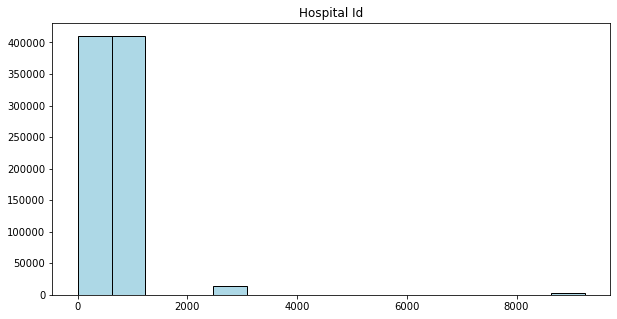

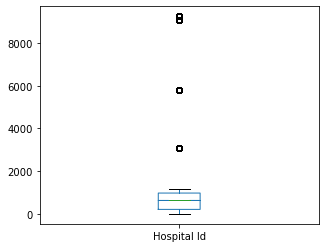

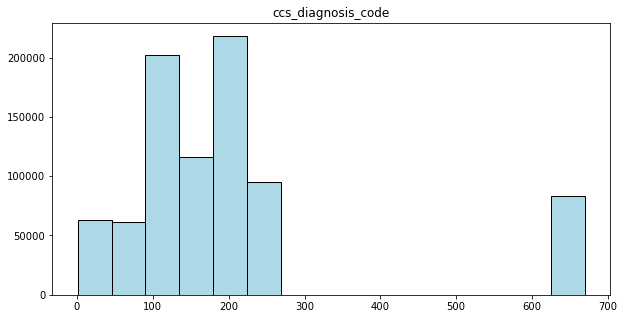

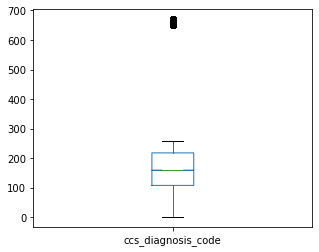

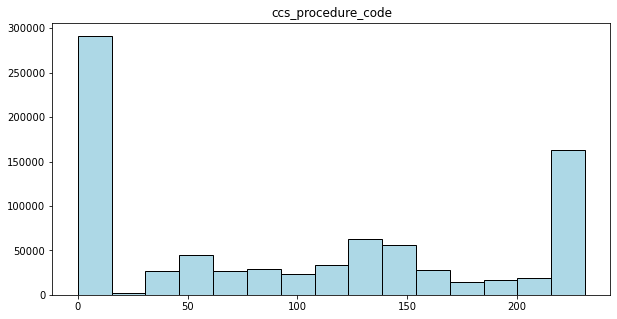

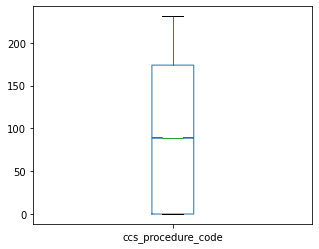

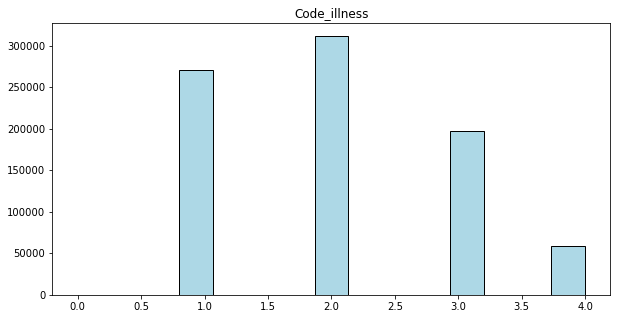

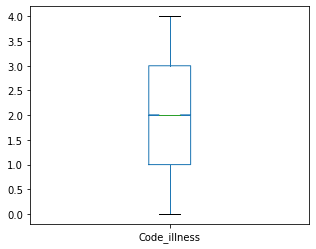

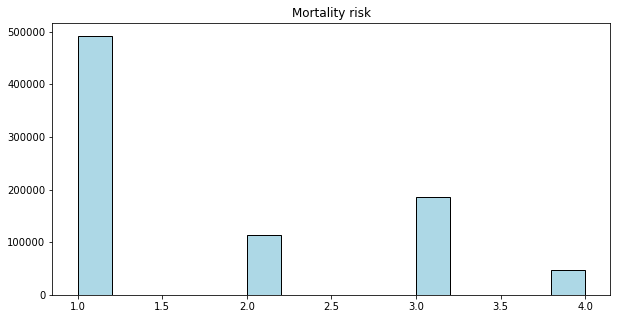

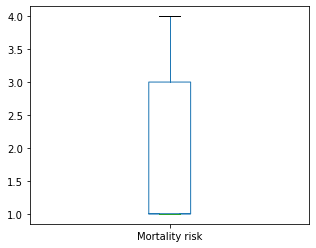

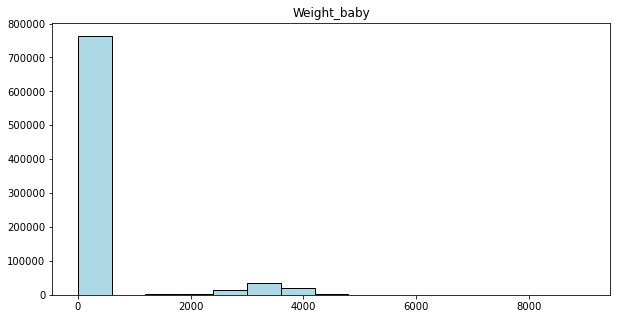

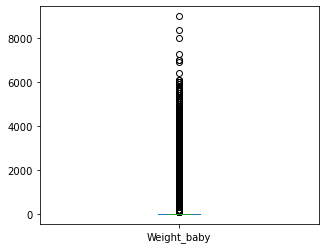

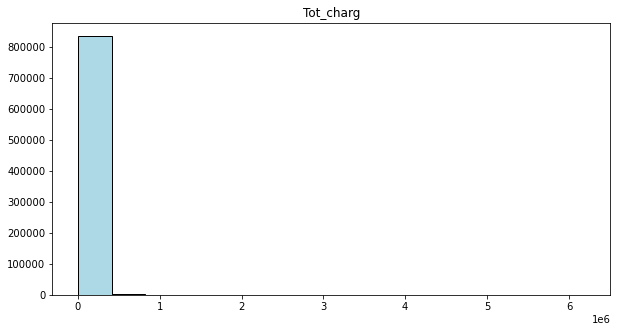

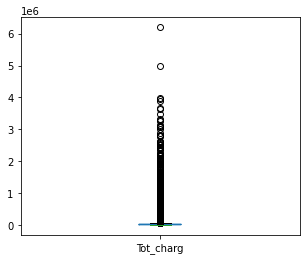

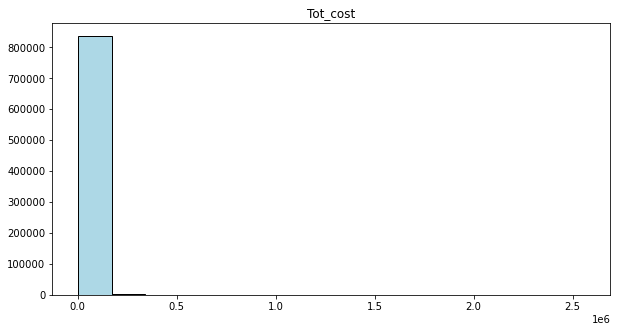

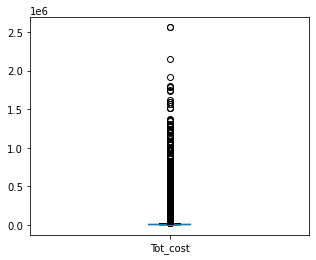

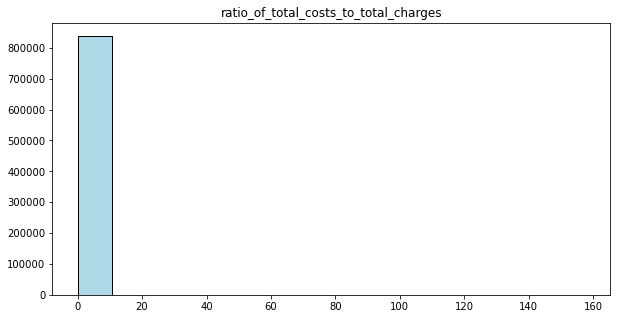

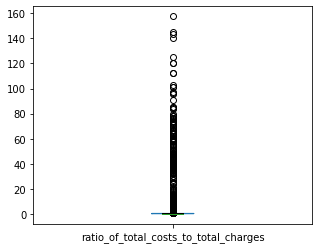

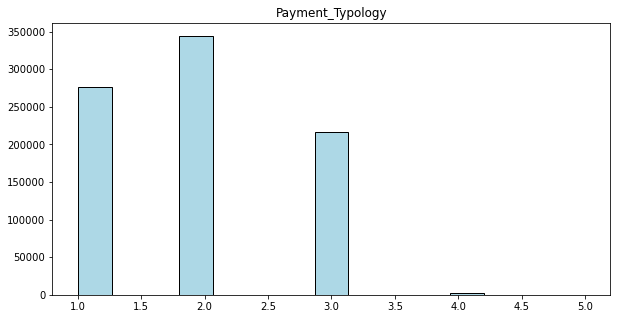

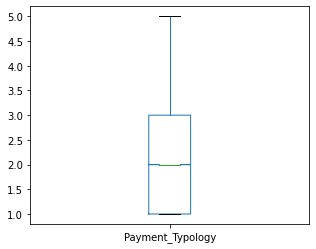

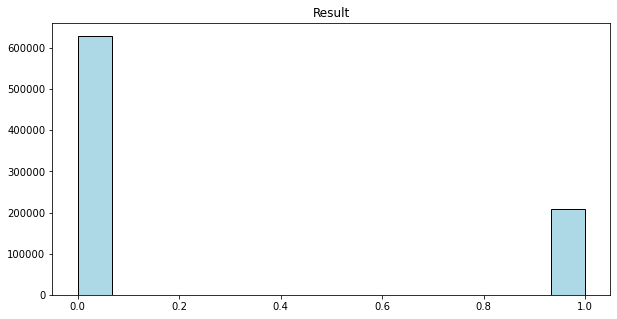

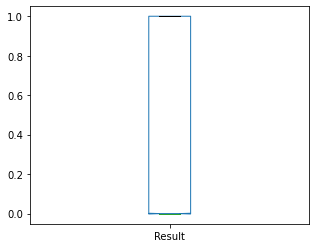

In [17]:
numerical = data1.select_dtypes(exclude='object')
for col in numerical.columns:
    #histogram
    numerical.hist(column = col,
              grid=False,        #Do not include the grid
              figsize=(10,5),
             color="lightblue",
             edgecolor="black",
             bins=15)            #(Length,Height) of the plot in inches
    plt.show()
    #boxplot
    numerical.boxplot(column= col,
                grid= False,
                figsize=(5,4),
                notch=True)
    plt.show()

#### Uni-variate Analysis of Categorical Variable

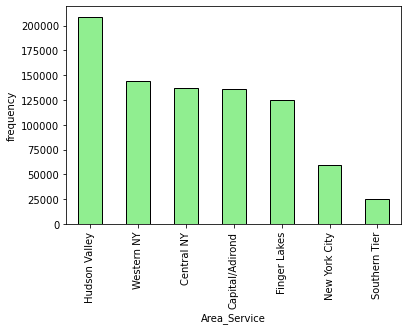

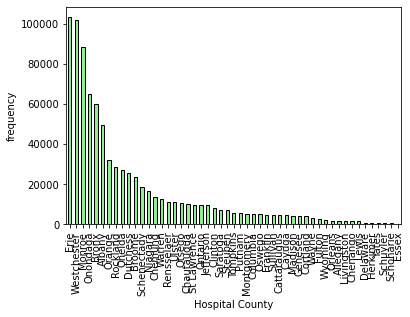

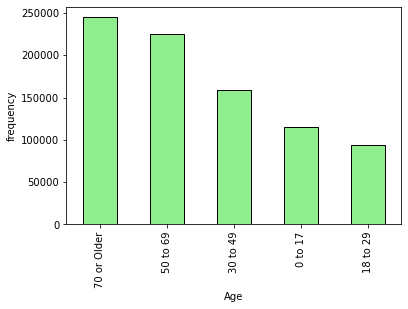

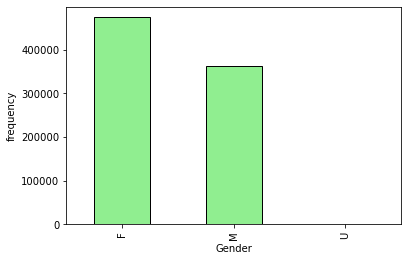

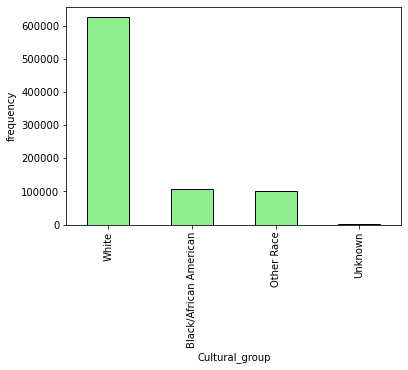

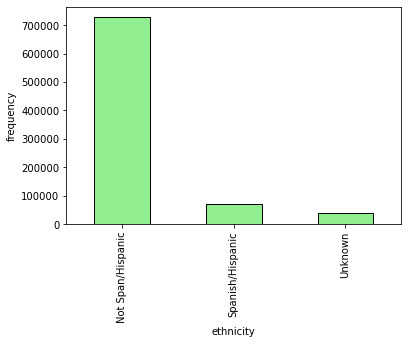

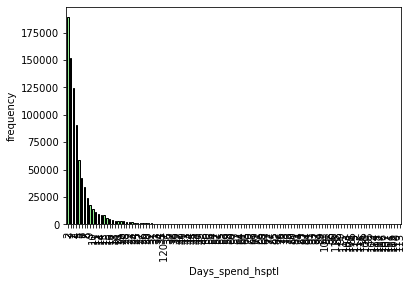

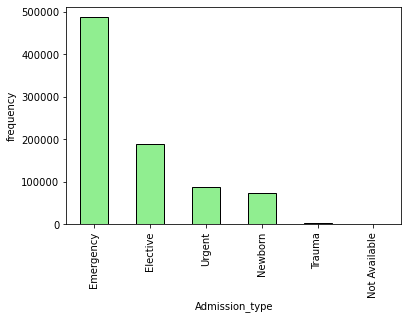

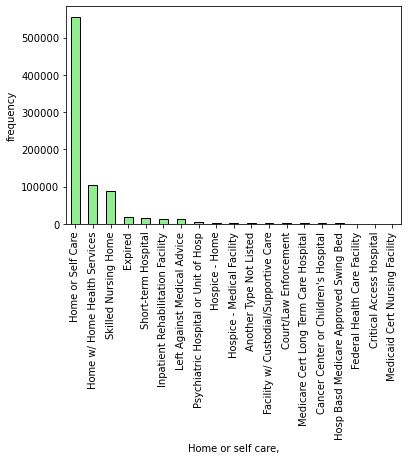

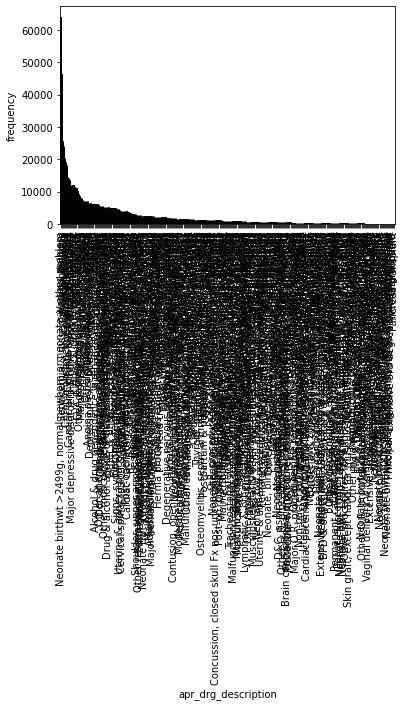

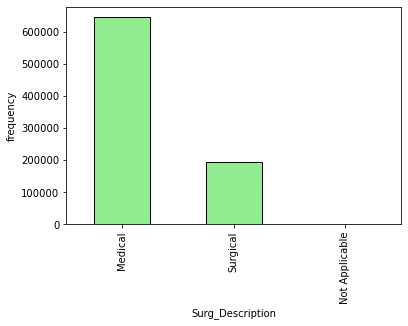

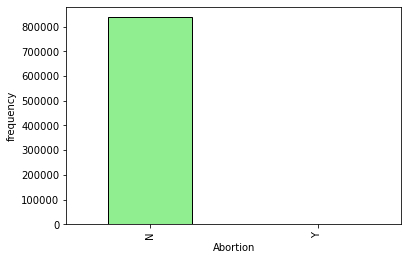

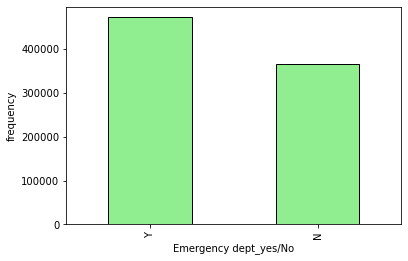

In [18]:
categorical = data1.select_dtypes(include='object')
for col in categorical.columns:
    #bar_plot
    data1[col].value_counts().plot( kind='bar', xlabel=col, ylabel='frequency', color=['lightGreen'],edgecolor="black",)
    plt.show()

#### Bi-variate Analysis of Numerical Variable

In [29]:
# numerical = data.select_dtypes(include='number')
# for col in numerical.columns:
#     if col != 'Result': # exclude target variable
#         # plot a histogram
#         plt.hist(data.loc[data['y'] == 'no', col], alpha=0.5, label='no', color='yellow')
#         plt.hist(data.loc[data['y'] == 'yes', col], alpha=0.5, label='yes', color='red')
#         plt.xlabel(col)
#         plt.ylabel('Frequency')
#         plt.legend()
#         plt.show()
#         # plot a box plot
#         sns.boxplot(x='y', y=col, data=data, color='lightblue')
#         plt.show()



#### Bi-variate Analysis of categorical Variable with Target Variable

In [30]:
# categorical = data.select_dtypes(include='object')
# for col in categorical.columns:
#     if col != 'Result': # exclude target variable
        
#         # create a crosstab
#         cross_tab = pd.crosstab(data[col], data['Result'])
#         # calculate proportion
#         cross_tab_prop = cross_tab.div(cross_tab.sum(axis=1), axis=0)
        
#         # plot a stacked bar chart with percentage of proportion
#         ax = cross_tab_prop.plot(kind='bar', stacked=True, xlabel=col, ylabel='Proportion', 
#                                  color=['pink', 'lightblue'], edgecolor="black")
#         ax.legend(['no', 'yes'])
#         for p in ax.patches:
#             width, height = p.get_width(), p.get_height()
#             x, y = p.get_xy() 
#             ax.annotate(f'{height:.0%}', (x + width/2, y + height/2), ha='center', va='center', fontsize=10)
#         plt.show()

#### Correlation heatmap


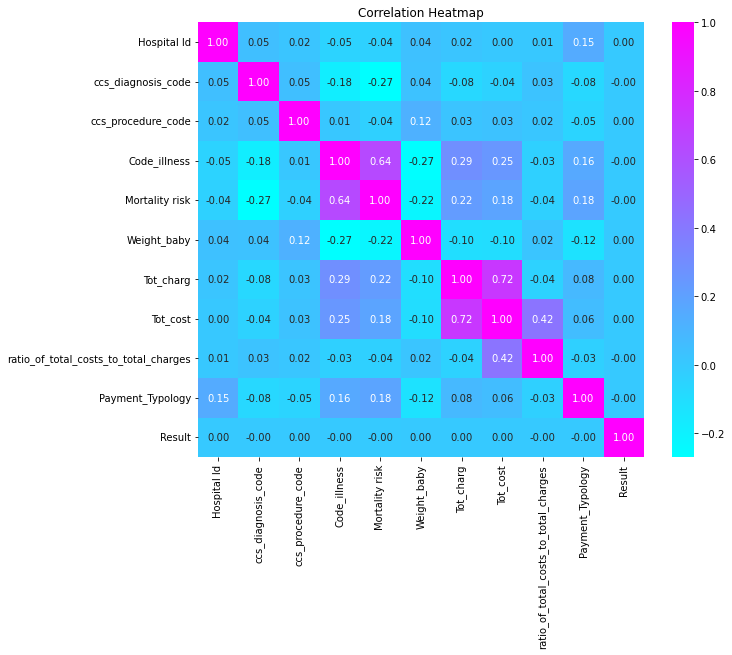

In [19]:
## CORRELATION HEATMAP TO FIND THE RELATION BETWEEN NUMERICAL VARIABLES
# Create a heatmap of the correlations with annotations
plt.subplots(figsize=(10, 8))
sns.heatmap(data1.corr(), cmap="cool", annot=True, fmt=".2f")

# Set plot title
plt.title("Correlation Heatmap")

# Show the plot
plt.show()

### Data cleaning and preprocessing

In [20]:
data1['Result']=data1['Result'].replace({0:1,1:0})
data1["Result"].sum()

629126

In [21]:
print(data1[data1['Result']==0]['Area_Service'].mode())
print(data1[data1['Result']==1]['Area_Service'].mode())

0    Hudson Valley
Name: Area_Service, dtype: object
0    Hudson Valley
Name: Area_Service, dtype: object


In [22]:
# Filling the missing values with the mode since it's a categorical column
data1['Area_Service'].fillna(value=0.0,inplace=True)

In [23]:
data1['Area_Service'].isnull().sum()

0

In [24]:
print(data1[data1['Result']==0]['Hospital County'].mode())
print(data1[data1['Result']==1]['Hospital County'].mode())

0    Erie
Name: Hospital County, dtype: object
0    Erie
Name: Hospital County, dtype: object


In [25]:
# Filling the missing values with the mode since it's a categorical column
data1['Hospital County'].fillna(value=0.0,inplace=True)

In [26]:
data1['Hospital County'].isnull().sum()

0

In [27]:
print(data1[data1['Result']==0]['Mortality risk'].mode())
print(data1[data1['Result']==1]['Mortality risk'].mode())

0    1.0
Name: Mortality risk, dtype: float64
0    1.0
Name: Mortality risk, dtype: float64


In [28]:
# Filling the missing values with the mode since it's a categorical column
data1['Mortality risk'].fillna(value=0.0,inplace=True)

In [29]:
data1['Mortality risk'].isnull().sum()

0

In [30]:
data1.columns

Index(['Area_Service', 'Hospital County', 'Hospital Id', 'Age', 'Gender',
       'Cultural_group', 'ethnicity', 'Days_spend_hsptl', 'Admission_type',
       'Home or self care,', 'ccs_diagnosis_code', 'ccs_procedure_code',
       'apr_drg_description', 'Code_illness', 'Mortality risk',
       'Surg_Description', 'Weight_baby', 'Abortion', 'Emergency dept_yes/No',
       'Tot_charg', 'Tot_cost', 'ratio_of_total_costs_to_total_charges',
       'Payment_Typology', 'Result'],
      dtype='object')

In [31]:
data=data1.drop('Hospital Id',axis=1)
data.columns

Index(['Area_Service', 'Hospital County', 'Age', 'Gender', 'Cultural_group',
       'ethnicity', 'Days_spend_hsptl', 'Admission_type', 'Home or self care,',
       'ccs_diagnosis_code', 'ccs_procedure_code', 'apr_drg_description',
       'Code_illness', 'Mortality risk', 'Surg_Description', 'Weight_baby',
       'Abortion', 'Emergency dept_yes/No', 'Tot_charg', 'Tot_cost',
       'ratio_of_total_costs_to_total_charges', 'Payment_Typology', 'Result'],
      dtype='object')

In [32]:
feature = data.drop(["Result"],axis=1)  #predictors
target = data["Result"] #target

In [33]:
def calc_woe_iv(feature, target):
   # Create a dataframe to store the WOE and IV values for each category/bin
    woe_iv_df = pd.DataFrame(columns=['Category/Bin', 'Event', 'Non-Event', 'WOE', 'IV'])
    # Check the data type of the feature
    if feature.dtypes == 'object':
        # Categorical feature
        feature.fillna('Missing', inplace=True)
        unique_categories = feature.unique()
        for category in unique_categories:
            event_count = len(target[(feature == category) & (target == 1)])
            non_event_count = len(target[(feature == category) & (target == 0)])
            total_event = len(target[target == 1])
            total_non_event = len(target[target == 0])
            event_rate = event_count / total_event
            non_event_rate = non_event_count / total_non_event
            woe = np.log(event_rate / non_event_rate)
            iv = (event_rate - non_event_rate) * woe
            woe_iv_df = woe_iv_df.append({'Category/Bin': category, 'Event': event_count, 'Non-Event': non_event_count, 'WOE': woe, 'IV': iv}, ignore_index=True)
    else:
        # Numerical feature
        bins = pd.qcut(feature, q=10, duplicates='drop')
        for category in bins.cat.categories:
            event_count = len(target[(bins == category) & (target == 1)])
            non_event_count = len(target[(bins == category) & (target == 0)])
            total_event = len(target[target == 1])
            total_non_event = len(target[target == 0])
            event_rate = event_count / total_event
            non_event_rate = non_event_count / total_non_event
            woe = np.log(event_rate / non_event_rate)
            iv = (event_rate - non_event_rate) * woe
            woe_iv_df = woe_iv_df.append({'Category/Bin': category, 'Event': event_count, 'Non-Event': non_event_count, 'WOE': woe, 'IV': iv}, ignore_index=True)
    # Calculate the total IV for the feature
    total_iv = woe_iv_df['IV'].sum()
    # Return the results
    return feature.name, woe_iv_df, total_iv, len(woe_iv_df)
def calculate_iv_df(data, target):
    iv_df = pd.DataFrame()  # define iv_df as an empty DataFrame
    iv_values = []
    for column in data.columns:
        feature = data[column]
        name, woe_iv, iv, n_bins = calc_woe_iv(feature, target)
        iv_values.append((name, iv, n_bins))
    iv_df = pd.DataFrame(iv_values, columns=['Feature', 'IV', 'Num_Bins'])
    iv_df.sort_values('IV', ascending=False, inplace=True)
    return iv_df

In [91]:
# Check data types and values of feature and data['Result']
print(type(feature))
print(type(data['Result']))
print(feature)
print(data['Result'])

# Verify that calculate_iv_df() returns the expected DataFrame
data1 = calculate_iv_df(feature, data['Result'])
print(data1)

# Verify that apply() is applied correctly to format the IV column
data1['IV'] = data1['IV'].apply(lambda x: '{:.5f}'.format(x))
print(data1)

# Verify that data1 has the expected columns and values
print(data1.columns)
print(data1.dtypes)
print(data1.head())

data1

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
           Area_Service Hospital County          Age Gender  \
0         New York City           Bronx      0 to 17      F   
1         Hudson Valley        Sullivan      0 to 17      M   
2            Central NY          Cayuga  70 or Older      M   
3         Hudson Valley     Westchester     18 to 29      M   
4          Finger Lakes          Monroe     50 to 69      M   
...                 ...             ...          ...    ...   
629140  Capital/Adirond     Schenectady     30 to 49      F   
629141       Western NY            Erie     30 to 49      F   
629142       Western NY            Erie     30 to 49      F   
629143       Central NY          Cayuga     50 to 69      F   
629144  Capital/Adirond          Albany     50 to 69      M   

                Cultural_group          ethnicity Days_spend_hsptl  \
0                   Other Race   Spanish/Hispanic                2   
1                   Other Rac

ZeroDivisionError: float division by zero

In [34]:
# # Define categorical variables
cat = ['Area_Service','Hospital County','Age','Gender','Cultural_group','ethnicity','Days_spend_hsptl','Admission_type','Home or self care,','ccs_diagnosis_code','ccs_procedure_code','apr_drg_description','Code_illness','Mortality risk','Surg_Description','Abortion','Emergency dept_yes/No','Payment_Typology']       

# # Define numerical variables
num = ['Weight_baby','Tot_charg','Tot_cost','ratio_of_total_costs_to_total_charges']

# Define target variables
target = 'Result'

#Convert categorical variables to type 'category'
for col in cat:
     data[col] = data[col].astype('category')

In [37]:
def IV_calculation(X, y, head = 100):
    clf = WOE()
    clf.fit(X, y)
    iv_values = clf.iv_df.head(head)
    return iv_values

In [38]:
from xverse.transformer import WOE


In [39]:
num=data.drop(columns=['Result'])
target=data.Result

In [40]:
!pip install --upgrade pandas

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Hi\\anaconda3\\Lib\\site-packages\\~andas\\_libs\\algos.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.




  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3


In [41]:
def calculate_woe(data, cat, target):
    # Create a cross-tabulation of the feature and target variable
    crosstab = pd.crosstab(data[cat], data[target])
    
    # Calculate the proportion of observations with positive and negative outcomes
    pos_rate = crosstab[1] / crosstab[1].sum()
    neg_rate = crosstab[0] / crosstab[0].sum()
    
    # Calculate the weight of evidence (WOE) for each category
    woe = np.log(pos_rate / neg_rate)
    
    # Create a dictionary to map each category to its corresponding WOE value
    woe_dict = dict(zip(crosstab.index, woe))
    
    return woe_dict

In [42]:
woe_df = pd.DataFrame(columns=['Variable Name', 'Category Name', 'WOE'])
for i in cat:
    woe = calculate_woe(data,i,'Result')
    for j in range(len(woe)):
        woe_df.loc[len(woe_df)] = [i, list(woe.keys())[j], list(woe.values())[j]]

In [43]:
woe_df = woe_df.sort_values(by=['Variable Name', 'WOE'], ascending=[True, False])
woe_df.reset_index(inplace=True, drop=True)

In [44]:
woe_dict = {}
for col in cat:
#     #print(col)
    temp_df = woe_df.loc[woe_df['Variable Name'] == str(col)]
    woe_dict[f'woe_{col}'] = temp_df

In [45]:
woe_df_Age = woe_df.loc[woe_df['Variable Name'] == "Age"]
woe_df_Age.reset_index(inplace=True, drop=True)
woe_df_Age

,Variable Name,Category Name,WOE
0,Age,30 to 49,0.003202
1,Age,70 or Older,0.000513
2,Age,50 to 69,-0.000009
3,Age,18 to 29,-0.000618
4,Age,0 to 17,-0.004957


In [49]:
woe_dict['woe_Mortality risk'].sort_values(by=['Category Name', 'WOE'], ascending=[True, False])
woe_dict['woe_Mortality risk']

,Variable Name,Category Name,WOE
226,Mortality risk,0.0,0.322894
227,Mortality risk,3.0,0.015275
228,Mortality risk,2.0,0.004369
229,Mortality risk,4.0,-0.004368
230,Mortality risk,1.0,-0.006348


In [50]:
woe_dict['woe_Area_Service']=woe_dict['woe_Area_Service'].sort_values(by=['Category Name', 'WOE'], ascending=[True, False])
woe_re_AS=woe_dict['woe_Area_Service'].reset_index(drop=True)
woe_re_AS

,Variable Name,Category Name,WOE
0,Area_Service,0.0,-0.126930
1,Area_Service,Capital/Adirond,-0.000377
2,Area_Service,Central NY,-0.000336
3,Area_Service,Finger Lakes,0.003056
4,Area_Service,Hudson Valley,0.000561
5,Area_Service,New York City,0.002040
6,Area_Service,Southern Tier,-0.009577
7,Area_Service,Western NY,-0.000147


# Re-Grouping Similar WOE Values for all Categorical Variables

## Area Service

In [54]:
data['Area_Service']=data['Area_Service'].replace({"New York City":'AS_G1',"Central NY":'AS_G1',"Western NY":'AS_G2',"Hudson Valley":'AS_G2',"Capital/Adirond":'AS_G3',"Finger Lakes":'AS_G3',"Southern Tier":'AS_G4'}) 

In [55]:
data['Area_Service'].value_counts()

AS_G2    353036
AS_G3    261476
AS_G1    196999
AS_G4     25375
0.0        1974
Name: Area_Service, dtype: int64

In [56]:
calculate_woe(data, 'Area_Service', 'Result')

{0.0: -0.1269301473730515,
 'AS_G3': 0.0012633551825310422,
 'AS_G1': 0.00038477336637778215,
 'AS_G4': -0.009576568159674156,
 'AS_G2': 0.0002718714436890615}

## Abortion

In [58]:
data['Abortion']=data['Abortion'].replace({"N":'AB_G1',"Y":'AB_G2'}) 

In [59]:
data['Abortion'].value_counts()

AB_G1    837679
AB_G2      1181
Name: Abortion, dtype: int64

In [60]:
calculate_woe(data, 'Abortion', 'Result')

{'AB_G1': 0.0002974816748985734, 'AB_G2': -0.20109152404939526}

## Admission Type

In [61]:
data['Admission_type']=data['Admission_type'].replace({"Trauma":'AT_G1',"White":'AT_G1',"Emergency":'AT_G1',"Newborn":'AT_G1',"Elective":'AT_G2',"Urgent":'AT_G2',"Not Available":'AT_G3'}) 

In [62]:
data['Admission_type'].value_counts()

AT_G1    561496
AT_G2    276544
AT_G3       820
Name: Admission_type, dtype: int64

In [63]:
calculate_woe(data, 'Admission_type', 'Result')

{'AT_G2': -0.00542578706670904,
 'AT_G3': -0.025728786247211987,
 'AT_G1': 0.0027155515582681328}

## Cultural Group

In [64]:
data['Cultural_group']=data['Cultural_group'].replace({"Black/African American":'CG_G1',"White":'CG_G1',"Other Race":'CG_G2',"Unknown":'CG_G3'}) 

In [65]:
data['Cultural_group'].value_counts()

CG_G1    733405
CG_G2    102421
CG_G3      3034
Name: Cultural_group, dtype: int64

In [66]:
calculate_woe(data, 'Cultural_group', 'Result')

{'CG_G1': -0.0013094627032530337,
 'CG_G2': 0.00853522366430983,
 'CG_G3': 0.029339341213253444}

## Surg Description

In [67]:
data['Surg_Description']=data['Surg_Description'].replace({"Surgical":'SD_G1',"Medical":'SD_G1',"Not Applicable":'SD_G2'}) 

In [68]:
data['Surg_Description'].value_counts()

SD_G1    838824
SD_G2        36
Name: Surg_Description, dtype: int64

In [69]:
calculate_woe(data, 'Surg_Description', 'Result')

{'SD_G2': 0.3228941874771643, 'SD_G1': -1.2720591018293638e-05}

## Payment Typology

In [70]:
data['Payment_Typology'] = data['Payment_Typology'].astype(str)

In [71]:
data['Payment_Typology']=data['Payment_Typology'].replace({"1":'PT_G1',"2":'PT_G1',"3":'PT_G1',"4":'PT_G1',"5":'PT_G2'}) 

In [72]:
data['Payment_Typology'].value_counts()

PT_G1    838808
PT_G2        52
Name: Payment_Typology, dtype: int64

In [73]:
calculate_woe(data, 'Payment_Typology', 'Result')

{'PT_G1': 1.2708242144188026e-05, 'PT_G2': -0.19562378191198196}

## Emergency Dept

In [74]:
data['Emergency dept_yes/No']=data['Emergency dept_yes/No'].replace({"N":'ED_G1',"Y":'ED_G2'}) 

In [75]:
data['Emergency dept_yes/No'].value_counts()

ED_G2    472164
ED_G1    366696
Name: Emergency dept_yes/No, dtype: int64

In [76]:
calculate_woe(data, 'Emergency dept_yes/No', 'Result')

{'ED_G1': -0.004150666626271236, 'ED_G2': 0.0032294771505880287}

## Gender

In [77]:
data['Gender']=data['Gender'].replace({"M":'GN_G1',"F":'GN_G1',"U":'GN_G2'}) 

In [78]:
data['Gender'].value_counts()

GN_G1    838819
GN_G2        41
Name: Gender, dtype: int64

In [79]:
calculate_woe(data, 'Gender', 'Result')

{'GN_G1': -3.974151934056391e-05, 'GN_G2': 1.1261320580703376}

## Ethnicity

In [80]:
data['ethnicity ']=data['ethnicity'].replace({"Spanish/Hispanic":'ET_G1',"Unknown":'ET_G3',"Not Span/Hispanic":'ET_G2'}) 
data['ethnicity ']

0         ET_G2
1         ET_G2
2         ET_G3
3         ET_G2
4         ET_G2
          ...  
838855    ET_G2
838856    ET_G2
838857    ET_G2
838858    ET_G2
838859    ET_G2
Name: ethnicity , Length: 838860, dtype: category
Categories (3, object): ['ET_G2', 'ET_G1', 'ET_G3']

In [81]:
data['ethnicity'] = data['ethnicity'].apply(lambda x: 'ET_G1' if x=='Spanish/Hispanic'else x )
data['ethnicity'] = data['ethnicity'].apply(lambda x: 'ET_G2' if x=='Not Span/Hispanic'else x )
data['ethnicity'] = data['ethnicity'].apply(lambda x: 'ET_G3' if x=='Unknown'else x )

In [82]:
data['ethnicity'].value_counts()

ET_G2    728405
ET_G1     70492
ET_G3     39963
Name: ethnicity, dtype: int64

In [83]:
calculate_woe(data, 'ethnicity', 'Result')

{'ET_G2': -0.0015753438696964866,
 'ET_G1': 0.011958620550494199,
 'ET_G3': 0.007708871268325348}

## AGE

In [85]:
data['Age']=data['Age'].replace({"0 to 17":'AG_G1',"18 to 29":'AG_G1',"30 to 49":'AG_G2',"50 to 69":'AG_G2',"70 or Older":'AG_G3'}) 
data['Age']

0         AG_G2
1         AG_G2
2         AG_G1
3         AG_G1
4         AG_G2
          ...  
838855    AG_G3
838856    AG_G2
838857    AG_G3
838858    AG_G2
838859    AG_G3
Name: Age, Length: 838860, dtype: category
Categories (3, object): ['AG_G1', 'AG_G2', 'AG_G3']

In [86]:
data['Age'].value_counts()

AG_G2    384489
AG_G3    244868
AG_G1    209503
Name: Age, dtype: int64

In [87]:
calculate_woe(data, 'Age', 'Result')

{'AG_G1': -0.003014332520355296,
 'AG_G2': 0.0013175464379253684,
 'AG_G3': 0.0005128816088375077}

## Mortality Risk

In [88]:
data['Mortality risk'] = data['Mortality risk'].astype(str)

In [89]:
data['Mortality risk']=data['Mortality risk'].replace({"1.0":'MR_G1',"2.0":'MR_G2',"3.0":'MR_G3',"4.0":'MR_G4'}) 
data['Mortality risk']

0         MR_G1
1         MR_G2
2         MR_G1
3         MR_G1
4         MR_G3
          ...  
838855    MR_G3
838856    MR_G2
838857    MR_G2
838858    MR_G2
838859    MR_G3
Name: Mortality risk, Length: 838860, dtype: object

In [90]:
data['Mortality risk'].value_counts()

MR_G1    491846
MR_G3    186091
MR_G2    113116
MR_G4     47771
0.0          36
Name: Mortality risk, dtype: int64

In [91]:
calculate_woe(data, 'Mortality risk', 'Result')

{'0.0': 0.3228941874771643,
 'MR_G1': -0.006347742721489689,
 'MR_G2': 0.004368739582064573,
 'MR_G3': 0.01527483427196768,
 'MR_G4': -0.0043678304690264}

## Code illness

In [92]:
data['Code_illness'] = data['Code_illness'].astype(str)

In [93]:
data['Code_illness ']=data['Code_illness'].replace({"0":'CI_G1',"1":'CI_G2',"2":'CI_G2',"3":'CI_G2',"4":'CI_G2'}) 

In [94]:
data['Code_illness'] = data['Code_illness'].apply(lambda x: 'CI_G1' if x=='1'or  x=='2'or  x=='3' or  x=='4'else x )
data['Code_illness'] = data['Code_illness'].apply(lambda x: 'CI_G2' if x=='0' else x )

In [95]:
data['Code_illness'].value_counts()

CI_G1    838824
CI_G2        36
Name: Code_illness, dtype: int64

In [96]:
calculate_woe(data, 'Code_illness', 'Result')

{'CI_G1': -1.2720591018293638e-05, 'CI_G2': 0.3228941874771643}

## Home or self care

In [97]:
data_re=pd.read_csv("WOEGrouped_Final.csv")

data_re.drop(["Unnamed: 0.3","Unnamed: 0.2","Unnamed: 0.1","Unnamed: 0"],axis=1)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\Hi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3369, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Hi\AppData\Local\Temp\ipykernel_32720\702005050.py", line 3, in <cell line: 3>
    data_re.drop(["Unnamed: 0.3","Unnamed: 0.2","Unnamed: 0.1","Unnamed: 0"],axis=1)
  File "C:\Users\Hi\anaconda3\lib\site-packages\pandas\util\_decorators.py", line 331, in wrapper
  File "C:\Users\Hi\anaconda3\lib\site-packages\pandas\core\frame.py", line 5399, in drop
  File "C:\Users\Hi\anaconda3\lib\site-packages\pandas\util\_decorators.py", line 331, in wrapper
  File "C:\Users\Hi\anaconda3\lib\site-packages\pandas\core\generic.py", line 4505, in drop
    def drop(
  File "C:\Users\Hi\anaconda3\lib\site-packages\pandas\core\generic.py", line 4546, in _drop_axis
  File "C:\Users\Hi\anaconda3\lib\site-packages\pandas\core\indexes\base.py", line 6934, in drop
    isinstance(self, ABCMultiIndex)
K

In [98]:
woe_df_HSC = woe_df.loc[woe_df['Variable Name'] == "Home or self care,"]
woe_df_HSC.reset_index(inplace=True, drop=True)
woe_df_HSC

,Variable Name,Category Name,WOE
0,"Home or self care,",Facility w/ Custodial/Supportive Care,0.039587
1,"Home or self care,",Hospice - Medical Facility,0.033087
2,"Home or self care,",Medicare Cert Long Term Care Hospital,0.021474
3,"Home or self care,",Left Against Medical Advice,0.010295
4,"Home or self care,",Home w/ Home Health Services,0.005878
5,"Home or self care,",Home or Self Care,0.001774
6,"Home or self care,",Skilled Nursing Home,0.000978
7,"Home or self care,",Short-term Hospital,-0.003295
8,"Home or self care,",Expired,-0.023174
9,"Home or self care,",Inpatient Rehabilitation Facility,-0.033299


In [99]:
woe_df_HSC["Regrouping"] = np.nan
woe_df_HSC

,Variable Name,Category Name,WOE,Regrouping
0,"Home or self care,",Facility w/ Custodial/Supportive Care,0.039587,NaN
1,"Home or self care,",Hospice - Medical Facility,0.033087,NaN
2,"Home or self care,",Medicare Cert Long Term Care Hospital,0.021474,NaN
3,"Home or self care,",Left Against Medical Advice,0.010295,NaN
4,"Home or self care,",Home w/ Home Health Services,0.005878,NaN
5,"Home or self care,",Home or Self Care,0.001774,NaN
6,"Home or self care,",Skilled Nursing Home,0.000978,NaN
7,"Home or self care,",Short-term Hospital,-0.003295,NaN
8,"Home or self care,",Expired,-0.023174,NaN
9,"Home or self care,",Inpatient Rehabilitation Facility,-0.033299,NaN


In [100]:
criteria = {}

x = np.round(np.arange(-0.18,0.22,0.02),4)
y = np.round(np.arange(-0.20,0.22,0.02),4)

count = 1
for i,j in zip(x,y):
    if i>0 and j>0:
        criteria[f'HSC_G{count}'] = (i,j)
    else:
        criteria[f'HC_G{count}'] = (i,j)
count = count + 1
criteria

{'HC_G1': (0.02, -0.0), 'HSC_G1': (0.2, 0.18)}

In [101]:
columns = ['Groups', 'limit1', 'limit2']
criteria_df=pd.DataFrame(index=range(len(criteria)),columns=columns)
count=0
for key,value in zip(criteria,criteria.values()):
#     #print(key,value[0],value[1])
    criteria_df.iloc[count,0] = key
    criteria_df.iloc[count,1] = value[0]
    criteria_df.iloc[count,2] = value[1]
    count = count+1
criteria_df

,Groups,limit1,limit2
0,HC_G1,0.02,-0.0
1,HSC_G1,0.2,0.18


In [102]:
 for i in range(len(woe_df_HSC)):
        for j in range(len(criteria_df)):  
            if (woe_df_HSC.iloc[i,2] < criteria_df.iloc[j,1] and woe_df_HSC.iloc[i,2]> criteria_df.iloc[j,2]):
                woe_df_HSC.iloc[i,3] = criteria_df.iloc[j,0]
woe_df_HSC

,Variable Name,Category Name,WOE,Regrouping
0,"Home or self care,",Facility w/ Custodial/Supportive Care,0.039587,NaN
1,"Home or self care,",Hospice - Medical Facility,0.033087,NaN
2,"Home or self care,",Medicare Cert Long Term Care Hospital,0.021474,NaN
3,"Home or self care,",Left Against Medical Advice,0.010295,HC_G1
4,"Home or self care,",Home w/ Home Health Services,0.005878,HC_G1
5,"Home or self care,",Home or Self Care,0.001774,HC_G1
6,"Home or self care,",Skilled Nursing Home,0.000978,HC_G1
7,"Home or self care,",Short-term Hospital,-0.003295,NaN
8,"Home or self care,",Expired,-0.023174,NaN
9,"Home or self care,",Inpatient Rehabilitation Facility,-0.033299,NaN


In [103]:
 woe_df_HSC['Regrouping'].nunique()

1

In [104]:
 for i in range(len(data_re)):
        for j in range(len(woe_df_HSC)):  
             if data_re.iloc[i,8]== woe_df_HSC.iloc[j,1]:
                
                data_re.iloc[i,8]= woe_df_HSC.iloc[j,3]

In [106]:
data["Home or self care,"].value_counts()

Home or Self Care                        555761
Home w/ Home Health Services             105760
Skilled Nursing Home                      87140
Expired                                   18267
Short-term Hospital                       17160
Inpatient Rehabilitation Facility         13967
Left Against Medical Advice               13664
Psychiatric Hospital or Unit of Hosp       5392
Hospice - Home                             3814
Hospice - Medical Facility                 3752
Another Type Not Listed                    3635
Facility w/ Custodial/Supportive Care      2798
Court/Law Enforcement                      2637
Medicare Cert Long Term Care Hospital      1695
Cancer Center or Children's Hospital       1515
Hosp Basd Medicare Approved Swing Bed      1505
Federal Health Care Facility                365
Critical Access Hospital                     27
Medicaid Cert Nursing Facility                6
Name: Home or self care,, dtype: int64

In [107]:
data.to_csv('Grouped_Final.csv')

## apr-drg description

In [108]:
data_re=pd.read_csv('Grouped_Final.csv')
data_re=data_re.drop(["Unnamed: 0"],axis=1)
data_re

,Area_Service,Hospital County,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,"Home or self care,",ccs_diagnosis_code,...,Weight_baby,Abortion,Emergency dept_yes/No,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Payment_Typology,Result,ethnicity,Code_illness
0,AS_G1,Onondaga,AG_G2,GN_G1,CG_G1,ET_G2,5,AT_G2,Home or Self Care,660,...,0,AB_G1,ED_G1,8990.22,4801.74,0.534107,PT_G1,0,ET_G2,CI_G2
1,AS_G2,Erie,AG_G2,GN_G1,CG_G1,ET_G2,6,AT_G1,Another Type Not Listed,660,...,0,AB_G1,ED_G2,11604.62,7420.40,0.639435,PT_G1,1,ET_G2,CI_G2
2,AS_G2,Westchester,AG_G1,GN_G1,CG_G2,ET_G3,2,AT_G1,Home or Self Care,218,...,3400,AB_G1,ED_G1,3072.25,947.56,0.308424,PT_G1,1,ET_G3,CI_G2
3,AS_G2,Erie,AG_G1,GN_G1,CG_G1,ET_G2,3,AT_G1,Home or Self Care,218,...,4000,AB_G1,ED_G1,3906.92,2048.56,0.524342,PT_G1,1,ET_G2,CI_G2
4,AS_G1,Bronx,AG_G2,GN_G1,CG_G1,ET_G2,5,AT_G1,Home w/ Home Health Services,50,...,0,AB_G1,ED_G2,44588.10,9461.28,0.212193,PT_G1,0,ET_G2,CI_G2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838855,AS_G2,Rockland,AG_G3,GN_G1,CG_G1,ET_G2,3,AT_G1,Home or Self Care,229,...,0,AB_G1,ED_G2,19334.31,4052.27,0.209590,PT_G1,1,ET_G2,CI_G2
838856,AS_G3,Monroe,AG_G2,GN_G1,CG_G1,ET_G2,8,AT_G1,Home w/ Home Health Services,122,...,0,AB_G1,ED_G2,18326.20,8070.47,0.440379,PT_G1,1,ET_G2,CI_G2
838857,AS_G2,Westchester,AG_G3,GN_G1,CG_G1,ET_G2,3,AT_G1,Skilled Nursing Home,55,...,0,AB_G1,ED_G2,12807.98,6835.37,0.533681,PT_G1,0,ET_G2,CI_G2
838858,AS_G3,Warren,AG_G2,GN_G1,CG_G1,ET_G2,8,AT_G2,Home or Self Care,58,...,0,AB_G1,ED_G1,20933.82,8294.48,0.396224,PT_G1,1,ET_G2,CI_G2


In [109]:
data["apr_drg_description"].nunique()

316

In [110]:
woe_df_ADD = woe_df.loc[woe_df['Variable Name'] == "apr_drg_description"]
woe_df_ADD.reset_index(inplace=True, drop=True)
woe_df_ADD

,Variable Name,Category Name,WOE
0,apr_drg_description,Pancreas transplant,inf
1,apr_drg_description,Cleft lip & palate repair,0.493402
2,apr_drg_description,Principal diagnosis invalid as discharge diagn...,0.459653
3,apr_drg_description,Acute major eye infections,0.380009
4,apr_drg_description,Neonate birthwt 1500-1999g w congenital/perina...,0.367846
...,...,...,...
311,apr_drg_description,Neonate bwt 2000-2499g w major anomaly,-0.426851
312,apr_drg_description,Cardiomyopathy,-0.475303
313,apr_drg_description,Other major head & neck procedures,-0.518673
314,apr_drg_description,"Neonate, transferred <5 days old, not born here",-0.656659


In [111]:
woe_df_ADD["Regrouping"] = np.nan
woe_df_ADD

,Variable Name,Category Name,WOE,Regrouping
0,apr_drg_description,Pancreas transplant,inf,NaN
1,apr_drg_description,Cleft lip & palate repair,0.493402,NaN
2,apr_drg_description,Principal diagnosis invalid as discharge diagn...,0.459653,NaN
3,apr_drg_description,Acute major eye infections,0.380009,NaN
4,apr_drg_description,Neonate birthwt 1500-1999g w congenital/perina...,0.367846,NaN
...,...,...,...,...
311,apr_drg_description,Neonate bwt 2000-2499g w major anomaly,-0.426851,NaN
312,apr_drg_description,Cardiomyopathy,-0.475303,NaN
313,apr_drg_description,Other major head & neck procedures,-0.518673,NaN
314,apr_drg_description,"Neonate, transferred <5 days old, not born here",-0.656659,NaN


In [115]:
criteria = {}
x = np.round(np.arange(-0.78,0.90,0.02),2)
y = np.round(np.arange(-0.80,0.90,0.02),2)

count = 1
for i,j in zip(x,y):
    if i>0 and j>0:
    criteria[f'ADD_G{count}'] = (i,j)
    else:
    criteria[f'HC_G{count}'] = (i,j)
    count = count + 1
    criteria


IndentationError: expected an indented block (4275485863.py, line 8)

In [116]:
columns = ['Groups', 'limit1', 'limit2']
criteria_df=pd.DataFrame(index=range(len(criteria)),columns=columns)
count=0
for key,value in zip(criteria,criteria.values()):
   #print(key,value[0],value[1])
    criteria_df.iloc[count,0] = key
    criteria_df.iloc[count,1] = value[0]
    criteria_df.iloc[count,2] = value[1]
    count = count+1
    criteria_df

In [117]:
for i in range(len(woe_df_ADD)):
    for j in range(len(criteria_df)):  
             if (woe_df_ADD.iloc[i,2] < criteria_df.iloc[j,1] and woe_df_ADD.iloc[i,2]> criteria_df.iloc[j,2]):
                 woe_df_ADD.iloc[i,3] = criteria_df.iloc[j,0]
woe_df_ADD

,Variable Name,Category Name,WOE,Regrouping
0,apr_drg_description,Pancreas transplant,inf,NaN
1,apr_drg_description,Cleft lip & palate repair,0.493402,NaN
2,apr_drg_description,Principal diagnosis invalid as discharge diagn...,0.459653,NaN
3,apr_drg_description,Acute major eye infections,0.380009,NaN
4,apr_drg_description,Neonate birthwt 1500-1999g w congenital/perina...,0.367846,NaN
...,...,...,...,...
311,apr_drg_description,Neonate bwt 2000-2499g w major anomaly,-0.426851,NaN
312,apr_drg_description,Cardiomyopathy,-0.475303,NaN
313,apr_drg_description,Other major head & neck procedures,-0.518673,NaN
314,apr_drg_description,"Neonate, transferred <5 days old, not born here",-0.656659,NaN


In [118]:
data["apr_drg_description"].nunique()

316

In [119]:
df_data=woe_df_ADD.sample(10)
df_data

,Variable Name,Category Name,WOE,Regrouping
286,apr_drg_description,Other digestive system & abdominal procedures,-0.142215,NaN
114,apr_drg_description,Other esophageal disorders,0.026066,NaN
141,apr_drg_description,Hypertension,0.006674,HC_G1
294,apr_drg_description,Neonate birthwt 1500-1999g w major anomaly,-0.175328,NaN
222,apr_drg_description,"Other gastroenteritis, nausa & vomiting",-0.033180,NaN
293,apr_drg_description,"Pelvic evisceration, radical hysterectomy & ot...",-0.174233,NaN
169,apr_drg_description,Knee & lower leg procedures except foot,-0.005370,NaN
224,apr_drg_description,Other anemia & disorders of blood & blood-form...,-0.034353,NaN
61,apr_drg_description,Acute & subacute endocarditis,0.064659,NaN
211,apr_drg_description,"Neonate bwt 2000-2499g, normal newborn or neon...",-0.030169,NaN


In [121]:
# ### save it as csv
data_re.to_csv('FinalCopyGroupedWOE.csv') 

## MODEL FITTING

### Taking out Numerical Variables from dataset

In [122]:
numerical_Variables = data.select_dtypes(include=['int', 'float'])#exclude categorical variables
numerical_Variables=numerical_Variables.drop(["ccs_diagnosis_code","ccs_procedure_code"],axis=1)
numerical_Variables.columns

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\Hi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3369, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Hi\AppData\Local\Temp\ipykernel_32720\2199651560.py", line 2, in <cell line: 2>
    numerical_Variables=numerical_Variables.drop(["ccs_diagnosis_code","ccs_procedure_code"],axis=1)
  File "C:\Users\Hi\anaconda3\lib\site-packages\pandas\util\_decorators.py", line 331, in wrapper
  File "C:\Users\Hi\anaconda3\lib\site-packages\pandas\core\frame.py", line 5399, in drop
  File "C:\Users\Hi\anaconda3\lib\site-packages\pandas\util\_decorators.py", line 331, in wrapper
  File "C:\Users\Hi\anaconda3\lib\site-packages\pandas\core\generic.py", line 4505, in drop
    def drop(
  File "C:\Users\Hi\anaconda3\lib\site-packages\pandas\core\generic.py", line 4546, in _drop_axis
  File "C:\Users\Hi\anaconda3\lib\site-packages\pandas\core\indexes\base.py", line 6934, in drop
    isinstance(self,

In [123]:

# Extract the categorical variable to encode
cat_var = data['apr_drg_description']

# Calculate the frequency of each category
freq = cat_var.value_counts(normalize=True)

# Create a dictionary to map each category to its frequency
freq_dict = freq.to_dict()

# Replace the original categorical variable with its frequency-encoded version
data['apr_drg_description'] = cat_var.map(freq_dict)


### One-Hot Encoding of Categorical Variables

In [124]:
OHE_Categorical_Variables = pd.get_dummies(data[['Area_Service', 'Hospital County','Age', 'Gender','Cultural_group', 'ethnicity', 'Admission_type','Home or self care,','Surg_Description', 'Abortion', 'Emergency dept_yes/No']])
OHE_Categorical_Variables 

,Area_Service_0.0,Area_Service_AS_G3,Area_Service_AS_G1,Area_Service_AS_G4,Area_Service_AS_G2,Hospital County_0.0,Hospital County_Albany,Hospital County_Allegany,Hospital County_Bronx,Hospital County_Broome,...,"Home or self care,_Medicare Cert Long Term Care Hospital","Home or self care,_Psychiatric Hospital or Unit of Hosp","Home or self care,_Short-term Hospital","Home or self care,_Skilled Nursing Home",Surg_Description_SD_G2,Surg_Description_SD_G1,Abortion_AB_G1,Abortion_AB_G2,Emergency dept_yes/No_ED_G1,Emergency dept_yes/No_ED_G2
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
4,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838855,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
838856,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
838857,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,1
838858,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0


In [125]:
#combing the one hot encoded categorical variable to rest of the predictors
join= [numerical_Variables,OHE_Categorical_Variables] 
Data = pd.concat(join,axis=1,join='inner')  
Data.shape

(838860, 101)

### Assigning X as predictors and y as target

In [126]:
X = Data.drop(["Result"],axis=1)  #predictors
y = Data["Result"] #target

### Train-Valid Split

In [127]:
from sklearn.model_selection import train_test_split

# Split train set into train and validation sets (75/25 split)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_test, y_train_test, test_size=0.25, random_state=42, stratify=y_train_test)


In [129]:
from sklearn.model_selection import train_test_split

# # Split dataset into train and test sets (80/20 split)
# X_train_test, X_test, y_train_test, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Split train set into train and validation sets (75/25 split)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)


### MODEL 1: Logistic Regression- using all variables on class imbalanced data

In [130]:
#Fitting Logistic Regression Model
lr = LogisticRegression()
lr.fit(X_train,y_train)

#predictions on validation data
pred_valid = lr.predict(X_valid)   
pred_valid

#Metrics
Accuracy = accuracy_score(y_valid, pred_valid)
F1_score = f1_score(y_valid, pred_valid)
Recall_score = recall_score(y_valid, pred_valid)
AUROC = roc_auc_score(y_valid, pred_valid)

lm1 = pd.DataFrame({'Logistic_Model_1': [Accuracy,F1_score,Recall_score,AUROC]}, 
                                index=['Accuracy','F1_score','Recall','AUROC'])

print(classification_report(y_valid,pred_valid))
lm1

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     52434
           1       0.75      1.00      0.86    157281

    accuracy                           0.75    209715
   macro avg       0.37      0.50      0.43    209715
weighted avg       0.56      0.75      0.64    209715



,Logistic_Model_1
Accuracy,0.749975
F1_score,0.857127
Recall,1.000000
AUROC,0.500000


### MODEL 2: Decision Tree - using all variables on class imbalanced data

In [131]:
#Fitting Decision tree Model
dt = DecisionTreeClassifier(max_depth=6)
dt.fit(X_train,y_train)

#predictions on validation data
pred_valid = dt.predict(X_valid)   
pred_valid

#Metrics
Accuracy = accuracy_score(y_valid, pred_valid)
F1_score = f1_score(y_valid, pred_valid)
Recall_score = recall_score(y_valid, pred_valid)
AUROC = roc_auc_score(y_valid, pred_valid)

dt = pd.DataFrame({'DecisionTree': [Accuracy,F1_score,Recall_score,AUROC]}, 
                                index=['Accuracy','F1_score','Recall','AUROC'])

print(classification_report(y_valid,pred_valid))
dt

              precision    recall  f1-score   support

           0       0.25      0.00      0.00     52434
           1       0.75      1.00      0.86    157281

    accuracy                           0.75    209715
   macro avg       0.50      0.50      0.43    209715
weighted avg       0.62      0.75      0.64    209715



,DecisionTree
Accuracy,0.749918
F1_score,0.857084
Recall,0.999886
AUROC,0.500000


### MODEL 3: Random Forest - using all variables on class imbalanced data

In [132]:
#Fitting Random Forest Model
rf = RandomForestClassifier()
rf.fit(X_train, y_train) 
pred = rf.predict(X_valid)

#predictions on validation data
pred_valid = rf.predict(X_valid)   
pred_valid

#Metrics
Accuracy = accuracy_score(y_valid, pred_valid)
F1_score = f1_score(y_valid, pred_valid)
Recall_score = recall_score(y_valid, pred_valid)
AUROC = roc_auc_score(y_valid, pred_valid)

rf2 = pd.DataFrame({'Random_Forest_1': [Accuracy,F1_score,Recall_score,AUROC]}, 
                                index=['Accuracy','F1_score','Recall','AUROC'])

#print(classification_report(y_valid,pred_valid))
rf2


KeyboardInterrupt



### MODEL 4: Ada-Boost - using all variables on class imbalanced data

In [ ]:
#Fitting Adaboost Model
ada_boost = AdaBoostClassifier()
ada_boost.fit(X_train, y_train) 
pred = ada_boost.predict(X_valid)

#predictions on validation data
pred_valid = ada_boost.predict(X_valid)   
pred_valid

#Metrics
Accuracy = accuracy_score(y_valid, pred_valid)
F1_score = f1_score(y_valid, pred_valid)
Recall_score = recall_score(y_valid, pred_valid)
AUROC = roc_auc_score(y_valid, pred_valid)

adb2 = pd.DataFrame({'Adaboost_1': [Accuracy,F1_score,Recall_score,AUROC]}, 
                                index=['Accuracy','F1_score','Recall','AUROC'])

#print(classification_report(y_valid,pred_valid))
adb2

### Class-Balancing  using SMOTE

In [133]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())


KeyboardInterrupt



In [23]:
y_train.value_counts() #Class imbalanced data

0    469312
1    156944
Name: Result, dtype: int64

In [24]:
y_train1 = pd.DataFrame(y_train_res)
X_train1 = pd.DataFrame(X_train_res)

In [25]:
y_train.value_counts() #Oversampling using smote balanced the class

0    469312
1    156944
Name: Result, dtype: int64

### MODEL 5: Logistic Regression- using selected features on class balanced data


In [125]:
#Fitting Logistic Regression Model
lr = LogisticRegression()
lr.fit(X_train1,y_train1)

#predictions on validation data
pred_valid = lr.predict(X_valid)   
pred_valid

#Metrics
Accuracy = accuracy_score(y_valid, pred_valid)
F1_score = f1_score(y_valid, pred_valid)
Recall_score = recall_score(y_valid, pred_valid)
AUROC = roc_auc_score(y_valid, pred_valid)

lm2 = pd.DataFrame({'Logistic_Model_2': [Accuracy,F1_score,Recall_score,AUROC]}, 
                                index=['Accuracy','F1_score','Recall','AUROC'])

print(classification_report(y_valid,pred_valid))
lm2

              precision    recall  f1-score   support

           0       0.75      0.68      0.71    156684
           1       0.25      0.32      0.28     52068

    accuracy                           0.59    208752
   macro avg       0.50      0.50      0.50    208752
weighted avg       0.63      0.59      0.60    208752



,Logistic_Model_2
Accuracy,0.587774
F1_score,0.281832
Recall,0.324287
AUROC,0.499811


### MODEL 6: Decision Tree - using all features on class balanced data

In [126]:
#Fitting Decision tree Model
dt = DecisionTreeClassifier(max_depth=6)
dt.fit(X_train1,y_train1)

#predictions on validation data
pred_valid = dt.predict(X_valid)   
pred_valid

#Metrics
Accuracy = accuracy_score(y_valid, pred_valid)
F1_score = f1_score(y_valid, pred_valid)
Recall_score = recall_score(y_valid, pred_valid)
AUROC = roc_auc_score(y_valid, pred_valid)

dt = pd.DataFrame({'DecisionTree2': [Accuracy,F1_score,Recall_score,AUROC]}, 
                                index=['Accuracy','F1_score','Recall','AUROC'])

print(classification_report(y_valid,pred_valid))
dt

              precision    recall  f1-score   support

           0       0.75      0.96      0.84    156684
           1       0.25      0.04      0.07     52068

    accuracy                           0.73    208752
   macro avg       0.50      0.50      0.46    208752
weighted avg       0.63      0.73      0.65    208752



,DecisionTree2
Accuracy,0.730599
F1_score,0.071643
Recall,0.041676
AUROC,0.500606


### MODEL 7: Ada-boost -  using all variables on class balanced data

In [127]:
#Fitting Adaboost Model
ada_boost = AdaBoostClassifier()
ada_boost.fit(X_train1, y_train1) 
pred = ada_boost.predict(X_valid)

#predictions on validation data
pred_valid = ada_boost.predict(X_valid)   
pred_valid

#Metrics
Accuracy = accuracy_score(y_valid, pred_valid)
F1_score = f1_score(y_valid, pred_valid)
Recall_score = recall_score(y_valid, pred_valid)
AUROC = roc_auc_score(y_valid, pred_valid)

adb2 = pd.DataFrame({'Adaboost_2': [Accuracy,F1_score,Recall_score,AUROC]}, 
                                index=['Accuracy','F1_score','Recall','AUROC'])

#print(classification_report(y_valid,pred_valid))
adb2

,Adaboost_2
Accuracy,0.737574
F1_score,0.046573
Recall,0.025697
AUROC,0.499918


### MODEL 8: Random Forest - using all variables on class balanced data

In [128]:
#Fitting Random Forest Model
rf = RandomForestClassifier()
rf.fit(X_train1, y_train1) 
pred = rf.predict(X_valid)

#predictions on validation data
pred_valid = rf.predict(X_valid)   
pred_valid

#Metrics
Accuracy = accuracy_score(y_valid, pred_valid)
F1_score = f1_score(y_valid, pred_valid)
Recall_score = recall_score(y_valid, pred_valid)
AUROC = roc_auc_score(y_valid, pred_valid)

rf2 = pd.DataFrame({'Random_Forest_2': [Accuracy,F1_score,Recall_score,AUROC]}, 
                                index=['Accuracy','F1_score','Recall','AUROC'])

#print(classification_report(y_valid,pred_valid))
rf2

,Random_Forest_2
Accuracy,0.719845
F1_score,0.092119
Recall,0.056983
AUROC,0.498552


### Feature selection using random forest

In [147]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train2, y_train2)
sel.get_support()
selected_feat= X_train2.columns[(sel.get_support())]
len(selected_feat)
print(selected_feat)


KeyboardInterrupt



### RANDOM FOREST For Class Imbalanced Data and Selected Features

In [97]:
X_train=X_train[['Code_illness', 'Mortality risk', 'Weight_baby',
       'Tot_charg', 'Tot_cost', 'ratio_of_total_costs_to_total_charges',
       'Payment_Typology']]
X_test=X_test[['Code_illness', 'Mortality risk', 'Weight_baby',
       'Tot_charg', 'Tot_cost', 'ratio_of_total_costs_to_total_charges',
       'Payment_Typology']]

rf = RandomForestClassifier()
rf.fit(X_train,y_train)
pred_test = rf.predict(X_test)   #predictions on transformed validation data

F1_score = f1_score((y_test),(pred_test))
accuracy = accuracy_score((y_test),(pred_test))
auc_roc=roc_auc_score((y_test),(pred_test))
Metric=pd.DataFrame({'Random Forest For Class Imbalanced Data and Selected Features': [F1_score,accuracy,auc_roc]},
                    index=['F1_score','Accuracy','AUC-ROC'])
print(classification_report((y_test),(pred_test)))
Metric

              precision    recall  f1-score   support

           0       0.25      0.10      0.15     52315
           1       0.75      0.90      0.82    156438

    accuracy                           0.70    208753
   macro avg       0.50      0.50      0.48    208753
weighted avg       0.62      0.70      0.65    208753



,Random Forest For Class Imbalanced Data and Selected Features
F1_score,0.817037
Accuracy,0.698601
AUC-ROC,0.500157
